In [1]:
from maelzel.core import *

In [2]:
struct = ScoreStruct(r'''
3/16, 100
2/16
3/16
4/16
2/16
3/16
5/16
4/16
5/16
6/16
4/16, barline=double
2/16
4/16
3/16
7/16
2/16
4/16
.
5/16
4/16
8/16
4/16, barline=double
3/16
2/16
5/16
6/16
4/16
3/16
4/16
5/16
3/16
6/16
3/16, barline=double
6/16
3/16
4/16
5/16
2/16
3/16
4/16
5/16
8/16
4/16
6/16, barline=double
2/16
3/16
5/16
4/16
3/16
2/16
5/16
2/16
3/16
6/16
2/16, barline=double
3/16
.
.
.
2/16
3/16
4/16
5/16
4/16
8/16
2/16
3/16
4/16
3/16
.
.
4/16
4/16, barline=final
''')

setScoreStruct(struct)

Chain([4G:0.375♩:gliss=True, 4B:0.125♩, Rest:0.25♩, 4G:0.25♩:gliss=True, 4B:0.25♩, 4G:0.375♩:gliss=True, 4B:0.125♩, Rest:0.25♩, 4F#:0.75♩, Rest:0.25♩, …])
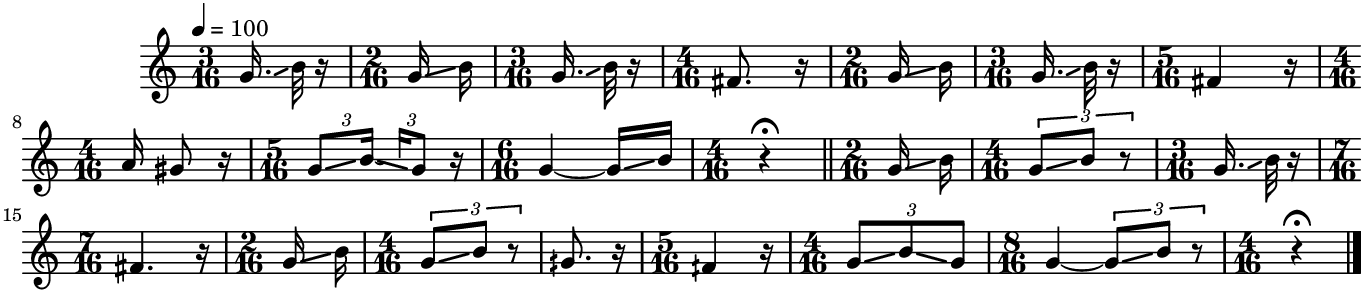

In [3]:
ch = Chain([
    "4G:3/8:gliss", "4B/32", "R/16",
    "4G/16:gliss", "4B/16",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#/8.", "R/16",
    
    "4G/16:gliss", "4B/16",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#/4", "R/16",
    
    "4A/16", "4G#/8", "R/16",
    "4G:1/3:gliss", "4B:1/3:gliss", "4G:1/3", "R/16",
    "4G~:1", "4G/16:gliss", "4B/16",
    
    Rest(1).addSymbol(symbols.Fermata()),
    
    "4G/16:gliss", "4B/16",
    "4G:1/3:gliss", "4B:1/3", "r:1/3",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#:1.5", "r/16",
    
    "4G/16:gliss", "4B/16",
    "4G:1/3:gliss", "4B:1/3", "r:1/3",
    
    "4G+:3/4", "r/16",
    "4F+:1", "r/16",
    
    "4G:1/3:gliss", "4B:1/3:gliss", "4G:1/3",
    "4G~:1", "4G:1/3:gliss", "4B:1/3", "r:1/3",
    
    Rest(1).addSymbol('fermata'),

])
ch

Chain([4G:0.375♩:gliss=True:symbols=[Slur(kind=start, uuid=0273bkza, linetype=solid)], 4B:0.125♩:symbols=[Slur(kind=end, uuid=0273bkza, linetype=solid)], Rest:0.25♩, 4G:0.25♩:gliss=True:symbols=[Slur(kind=start, uuid=qqeflfeo, linetype=solid)], 4B:0.25♩:symbols=[Slur(kind=end, uuid=qqeflfeo, linetype=solid)], 4G:0.375♩:gliss=True:symbols=[Slur(kind=start, uuid=moqi0biv, linetype=solid)], 4B:0.125♩:symbols=[Slur(kind=end, uuid=moqi0biv, linetype=solid)], Rest:0.25♩, 4F#:0.75♩:symbols=[Articulation(kind=tenuto)], Rest:0.25♩, …])
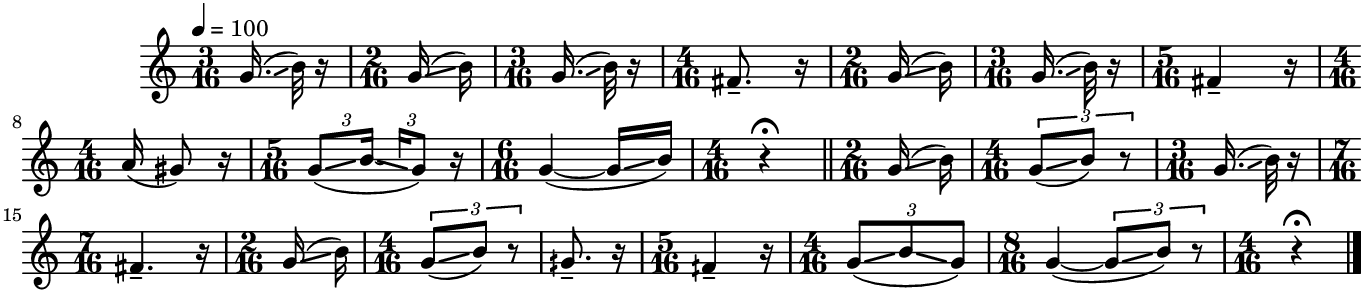

In [8]:
# Add slurs
ch2 = ch.copy()
for i in range(struct.numMeasures()):
    events = ch2.eventsBetween((i, 0), (i+1, 0))
    if not events or all(ev.isRest() for ev in events):
        continue
    firstev = next(ev for ev in events if not ev.isRest())
    lastev = next(ev for ev in reversed(events) if not ev.isRest())
    if firstev is not lastev:
        firstev.addSpanner('slur', endobj=lastev)
        firstev.setPlay(args=dict(kx=0, ky=0))
    else:
        firstev.addSymbol('tenuto')
        firstev.setPlay(args=dict(kx=0.5, ky=0.5))
ch2
    

In [13]:
ch2.play(instr='.sing')

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=21)
    Synth(𝍪 preset:.sing:501.0128, p4=0 idataidx_:5=18 inumbps:6=3 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 kx:15=0 ky:16=0 kvibamount:17=1 p18=0 p19=67 p20=0.515178 p21=0.225 ...)
    Synth(𝍪 preset:.sing:501.0129, p4=0 idataidx_:5=18 inumbps:6=3 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 kx:15=0 ky:16=0 kvibamount:17=1 p18=0 p19=67 p20=0.515178 p21=0.15 ...)
    Synth(𝍪 preset:.sing:501.013, p4=0 idataidx_:5=18 inumbps:6=3 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 kx:15=0 ky:16=0 kvibamount:17=1 p18=0 p19=67 p20=0.515178 p21=0.225 ...)
    Synth(𝍪 preset:.sing:501.0131, p4=0 idataidx_:5=18 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 kx:15=0.5 ky:16=0.5 kvibamount:17=1 p18=0 p19=66 p20=0.515178 p21=0.45 ...)
    Synth(𝍪 preset:.sing:501.0132, p4=0 idataidx_:5=18 inumbps:6=3 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 kx:15=0 ky:16=0 kvibamount:17=1 p18=0 p19=67 p20=0.515178 p21=0.15 ...)
    Synth(𝍪 preset:.sing:501.0133, p4=0 idataidx_:5=18 inumbps:6=3 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 kx:15=0 ky:16=0 kvibamount:17=1 p18=0 p19=67 p20=0.515178 p21=0.225 ...)
    Synth(𝍪 preset:.sing:501.0134, p4=0 idataidx_:5=18 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 kx:15=0.5 ky:16=0.5 kvibamount:17=1 p18=0 p19=66 p20=0.515178 p21=0.6 ...)
    Synth(𝍪 preset:.sing:501.0135, p4=0 idataidx_:5=18 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 kx:15=0 ky:16=0 kvibamount:17=1 p18=0 p19=69 p20=0.515178 p21=0.15 ...)
    Synth(𝍪 preset:.sing:501.0136, p4=0 idataidx_:5=18 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 kx:15=0 ky:16=0 kvibamount:17=1 p18=0 p19=68 p20=0.515178 p21=0.3 ...)
    Synth(𝍪 preset:.sing:501.0137, p4=0 idataidx_:5=18 inumbps:6=4 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 kx:15=0 ky:16=0 kvibamount:17=1 p18=0 p19=67 p20=0.515178 p21=0.2 ...)
    Synth(𝍪 preset:.sing:501.0138, p4=0 idataidx_:5=18 inumbps:6=4 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 kx:15=0 ky:16=0 kvibamount:17=1 p18=0 p19=67 p20=0.515178 p21=0.6 ...)
    Synth(𝍪 preset:.sing:501.0139, p4=0 idataidx_:5=18 inumbps:6=3 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 kx:15=0 ky:16=0 kvibamount:17=1 p18=0 p19=67 p20=0.515178 p21=0.15 ...)
    Synth(𝍪 preset:.sing:501.014, p4=0 idataidx_:5=18 inumbps:6=3 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 kx:15=0 ky:16=0 kvibamount:17=1 p18=0 p19=67 p20=0.515178 p21=0.2 ...)
    Synth(𝍪 preset:.sing:501.0141, p4=0 idataidx_:5=18 inumbps:6=3 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 kx:15=0 ky:16=0 kvibamount:17=1 p18=0 p19=67 p20=0.515178 p21=0.225 ...)
    Synth(𝍪 preset:.sing:501.0142, p4=0 idataidx_:5=18 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 kx:15=0.5 ky:16=0.5 kvibamount:17=1 p18=0 p19=66 p20=0.515178 p21=0.9 ...)
    Synth(𝍪 preset:.sing:501.0143, p4=0 idataidx_:5=18 inumbps:6=3 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 kx:15=0 ky:16=0 kvibamount:17=1 p18=0 p19=67 p20=0.515178 p21=0.15 ...)
    Synth(𝍪 preset:.sing:501.0144, p4=0 idataidx_:5=18 

In [8]:
from maelzel.scoring import notation

In [10]:
notation.Notation.__init__??

Signature:
notation.Notation.__init__(
    self,
    duration: 'time_t',
    pitches: 'list[pitch_t]' = None,
    offset: 'time_t' = None,
    isRest=False,
    tiedPrev=False,
    tiedNext=False,
    dynamic: 'str' = '',
    durRatios: 'list[F]' = None,
    group='',
    gliss: 'bool' = None,
    color='',
    stem='',
    sizeFactor=1,
    properties: 'dict[str, Any]' = None,
    _init=True,
)
Docstring: Initialize self.  See help(type(self)) for accurate signature.
Source:   
    def __init__(self,
                 duration: time_t,
                 pitches: list[pitch_t] = None,
                 offset: time_t = None,
                 isRest=False,
                 tiedPrev=False,
                 tiedNext=False,
                 dynamic: str = '',
                 durRatios: list[F] = None,
                 group='',
                 gliss: bool = None,
                 color='',
                 stem='',
                 sizeFactor=1,  # size is relative: 0 is normal, +1 is bigge

In [11]:
%ls

 centroid.ipynb                                   test-polygon.ipynb
 chain-recursive.ipynb                            test-preset-interpol.ipynb
 clip-chords.ipynb                                test-presets.ipynb
 clip.ipynb                                       test-quant.ipynb
 joaquinslied.ipynb                               test-routing.ipynb
 lprof0                                           test-scorestruct.ipynb
'maelzel.core - Test fade.ipynb'                  test-slurs.ipynb
'maelzel.core - Test named args as pargs.ipynb'   test-spanner.ipynb
'maelzel.core - Test offline render 1.ipynb'      test-spectral-transcr.ipynb
'maelzel.core - Test Redefined Preset.ipynb'      test-spectrum.ipynb
 musicxml-parse.ipynb                             test-symbols.ipynb
 partial-quant.ipynb                              test-symbols-musicxml.ipynb
 playground-transcribe.ipynb                      test-transposition.ipynb
 rosita.ipynb                                     test-voice.ipynb
 sn